In [1]:
import math
import torch
import gpytorch
import numpy as np
import numpy.linalg as linalg

import spectralgp
from spectralgp.samplers import AlternatingSampler
from spectralgp.models import ExactGPModel, SpectralModel, ProductKernelSpectralModel
from spectralgp.sampling_factories import ss_factory, ess_factory
from sklearn import datasets

import argparse

import sys
import matplotlib.pyplot as plt

import traceback

torch.set_default_dtype(torch.float64)

In [2]:

nomg = 100
ess_iters = 10
optim_iters = 1
iters = 2
omega_max = 8.
nclusters = 4
shared = "False"
in_dims = 4
torch.random.manual_seed(42)


In [3]:
x_messy, _ = datasets.make_classification(n_samples=500,
                                          n_features=in_dims,
                                          n_classes= nclusters,
                                          n_clusters_per_class=1,
                                          class_sep=0.7,
                                          shuffle=False,
                                          random_state=301)

x_messy = torch.from_numpy(x_messy)

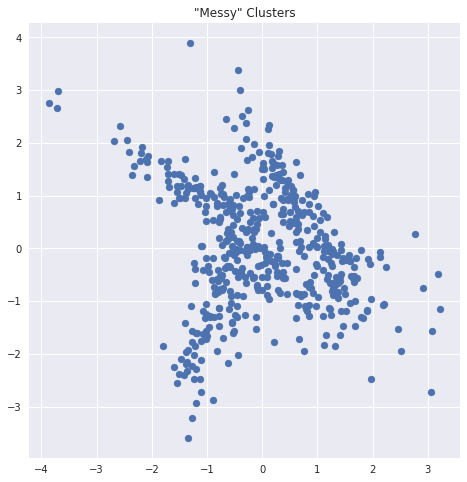

In [4]:
train_x = x_messy
test_x = x_messy

plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])


In [5]:
data_mod = spectralgp.models.FKL_KKM(train_x, None, nclusters, shared=shared,
        normalize = False, symmetrize = False, num_locs = nomg, spacing='random', pretrain=False, omega_max = omega_max, nonstat = True)

################################
## set up alternating sampler ##
################################

alt_sampler = spectralgp.samplers.AlternatingSampler(
[data_mod],
spectralgp.sampling_factories.ss_factory, [spectralgp.sampling_factories.ess_factory],
totalSamples=iters, numInnerSamples=ess_iters, numOuterSamples=optim_iters, num_dims=in_dims
)
alt_sampler.run()

0
tensor(8.)
0
tensor(8.)
0
tensor(8.)
Step:  0 Dimension:  0
likelihood.noise_covar.raw_noise tensor([0.])
covar_module.kernels.0.latent_lh.noise_covar.raw_noise tensor([0.])
covar_module.kernels.0.latent_mod.mean_module.constant tensor([0.])
covar_module.kernels.0.latent_mod.mean_module.lengthscale tensor([-0.3000])
covar_module.kernels.0.latent_mod.covar_module.raw_outputscale tensor(0.)
covar_module.kernels.0.latent_mod.covar_module.base_kernel.raw_lengthscale tensor([[0.]])
covar_module.kernels.1.latent_prior.gp_model.likelihood.noise_covar.raw_noise tensor([0.])
covar_module.kernels.1.latent_prior.gp_model.mean_module.constant tensor([0.])
covar_module.kernels.1.latent_prior.gp_model.mean_module.lengthscale tensor([-0.3000])
covar_module.kernels.1.latent_prior.gp_model.covar_module.raw_outputscale tensor(0.)
covar_module.kernels.1.latent_prior.gp_model.covar_module.base_kernel.raw_lengthscale tensor([[0.]])
covar_module.kernels.2.latent_prior.gp_model.likelihood.noise_covar.raw_n

KeyboardInterrupt: 

In [ ]:
plt.scatter(x_messy[:,0], x_messy[:,1])

In [ ]:
data_mod.set_train_data(inputs=test_x, targets=None, strict=False)

d = data_mod(test_x).mean - test_y

test_rmse = torch.sqrt(torch.mean(torch.pow(d, 2)))

print("Test RMSE: {}".format(test_rmse))

data_mod.set_train_data(inputs=data_x, targets=None, strict=False)

plt.plot(data_y.numpy(), label='data')
plt.plot(train_y.numpy(), marker='o', label='train')
plt.plot(data_mod(data_x).mean.detach().numpy(), marker='*', label='BLR')
plt.legend()
plt.show()
plt.savefig("BLR_out.png")

#print(data_mod(data_x).mean.detach().numpy())